In [1]:
import joblib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
y_pred = joblib.load('test_pred.sav')

In [3]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [4]:
y_pred.shape

(9828, 5)

In [5]:
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('../Data/clean_data_1.csv')

data_train, val_test = train_test_split(all_data, test_size=0.1, random_state=42)
data_val, data_test = train_test_split(val_test, test_size=0.5, random_state=42)

y_true = data_test.iloc[:, 1:].values

In [6]:
y_true.shape

(9828, 5)

In [7]:
y_true

array([[1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
diseases = pd.read_csv('../Data/clean_data_1.csv').columns[1:]

In [9]:
diseases

Index(['Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis',
       'Pleural Effusion'],
      dtype='object')

In [10]:
acc = y_true-y_pred

In [11]:
acc

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [12]:
mask = np.isin(acc, [-1, 1]).sum(axis=1) > 0
acc = acc[mask].reshape(-1, 5)

In [13]:
acc.shape

(7643, 5)

In [14]:
acc

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0., -1., -1.,  0.],
       ...,
       [-1., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1.,  0.,  0.]])

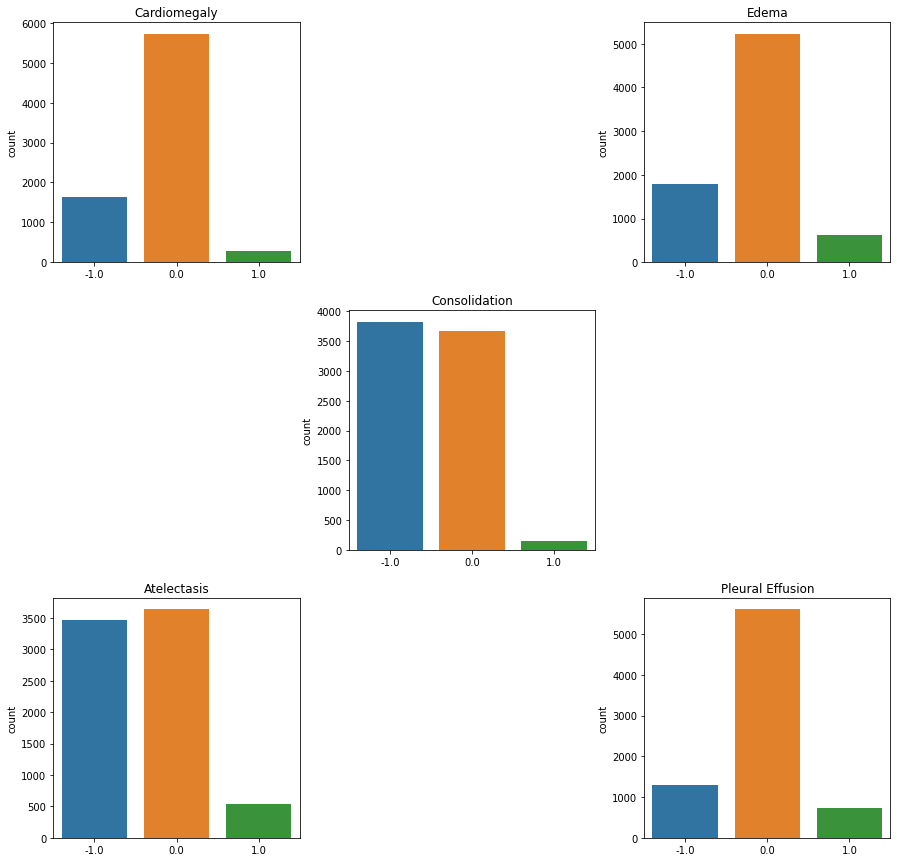

In [15]:
plt.figure(figsize=(15, 15))
for i, p in enumerate([1, 3, 5, 7, 9]):
    plt.subplot(3, 3, p)
    sns.countplot(x=acc[:, i]);
    plt.title(diseases[i])

_Cardiomegaly_

In [16]:
cardiomegaly_ones = acc[acc[:, 0] == 1]

In [17]:
# Cardiomegaly Vs the rest 
for i in [1, 2, 3, 4]:
    print(f'Interaction with {diseases[i]}: {list(cardiomegaly_ones[:, i]).count(-1)}')

Interaction with Edema: 45
Interaction with Consolidation: 111
Interaction with Atelectasis: 117
Interaction with Pleural Effusion: 30


_Edema_

In [18]:
edema_ones = acc[acc[:, 1] == 1]

In [19]:
# Edema Vs the rest 
for i in [0, 2, 3, 4]:
    print(f'Interaction with {diseases[i]}: {list(edema_ones[:, i]).count(-1)}')

Interaction with Cardiomegaly: 86
Interaction with Consolidation: 234
Interaction with Atelectasis: 267
Interaction with Pleural Effusion: 85


_Consolidation_

In [20]:
consolidation_ones = acc[acc[:, 2] == 1]

In [21]:
# Consolidation Vs the rest 
for i in [0, 1, 3, 4]:
    print(f'Interaction with {diseases[i]}: {list(consolidation_ones[:, i]).count(-1)}')

Interaction with Cardiomegaly: 38
Interaction with Edema: 36
Interaction with Atelectasis: 57
Interaction with Pleural Effusion: 15


_Atelectasis_

In [22]:
atelectasis_ones = acc[acc[:, 3] == 1]

In [23]:
# Atelectasis Vs the rest 
for i in [0, 1, 2, 4]:
    print(f'Interaction with {diseases[i]}: {list(atelectasis_ones[:, i]).count(-1)}')

Interaction with Cardiomegaly: 82
Interaction with Edema: 86
Interaction with Consolidation: 190
Interaction with Pleural Effusion: 48


_Pleural Effusion_

In [24]:
pleuralEffusion_ones = acc[acc[:, 4] == 1]

In [25]:
# Pleural Effusion Vs the rest 
for i in [0, 1, 2, 3]:
    print(f'Interaction with {diseases[i]}: {list(pleuralEffusion_ones[:, i]).count(-1)}')

Interaction with Cardiomegaly: 134
Interaction with Edema: 169
Interaction with Consolidation: 216
Interaction with Atelectasis: 282
